In [71]:
# !pip install statsmodels

In [72]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [73]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_29_06_02.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Adding 'barcelona' column with values equal to 1
df['barcelona'] = 1

# Adding the 'event' column with values equal to 1
df['event'] = 1

# Display the DataFrame
print(df.shape)

(431, 10)


In [74]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_29_06_02.csv'

# Read the CSV file into a DataFrame
V1 = pd.read_csv(file_path)

# Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 1
df = pd.concat([df, V1.assign(barcelona=0, event=1)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)



Updated df after adding rows from V1:
(754, 10)


In [75]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_24_05_28.csv'

# Read the CSV file into a DataFrame
V0 = pd.read_csv(file_path)

# Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 0
df = pd.concat([df, V0.assign(barcelona=0, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)


Updated df after adding rows from V1:
(1142, 10)


In [76]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_24_05_28.csv'

# Read the CSV file into a DataFrame
B0 = pd.read_csv(file_path)

# Adding rows from B0 to df with 'barcelona' values set to 1 and 'event' values set to 0
df = pd.concat([df, B0.assign(barcelona=1, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)
print(df.columns)


Updated df after adding rows from V1:
(1559, 10)
Index(['Hotels', 'Ratings', 'Distance', 'District', 'Price', 'Link', 'Star',
       'Descriptions', 'barcelona', 'event'],
      dtype='object')


In [77]:
# Create a DataFrame
df = pd.DataFrame(df)

In [78]:
# First, count the occurrences of each value in the 'Hotels' column
hotel_counts = df['Hotels'].value_counts()

# Then, create a new DataFrame containing only rows with 'Hotels' values that appear twice
df = df[df['Hotels'].isin(hotel_counts[hotel_counts == 2].index)]

# Finally, print the count of 'Hotels' values
print(df['Hotels'].value_counts())

SEALONA VILA OLIMPICA                                   2
Sunotel Central                                         2
Holiday Inn Express Barcelona City 22@, an IHG Hotel    2
Hotel Glòries                                           2
The 8 Boutique B&B                                      2
                                                       ..
You Stylish City Center Apartments                      2
Vincci Bit                                              2
BizFlats Eixample Apartments                            2
Rooms Nuevo Roger                                       2
Centrally Apartment in el Raval Neighbourhood           2
Name: Hotels, Length: 272, dtype: int64


In [79]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': € 1.903


In [80]:
# Extract only digits from the 'Price' column and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Extract the first digit and convert to numeric
df['Star'] = pd.to_numeric(df['Star'].str.extract('(\d)', expand=False), errors='coerce')

# Display the updated DataFrame
print(df.head())

                              Hotels Ratings             Distance  District  \
2              SEALONA VILA OLIMPICA     8,4  a 1,8 km del centro       NaN   
3             Habitaciones Viladomat     8,0  a 1,7 km del centro       NaN   
4  Nice apartment BCN two rooms wifi     8,4    a 2 km del centro       NaN   
6          Habitación triple/Ramblas     7,4   a 450 m del centro       NaN   
8            Catalonia Eixample 1864     8,7  a 0,7 km del centro       NaN   

   Price                                               Link  Star  \
2    360  https://www.booking.com/hotel/es/sealona-vila-...     4   
3    374  https://www.booking.com/hotel/es/habitaciones-...     4   
4    398  https://www.booking.com/hotel/es/nice-apartmen...     4   
6    427  https://www.booking.com/hotel/es/habitacion-tr...     2   
8    949  https://www.booking.com/hotel/es/catalonia-eix...     4   

                                        Descriptions  barcelona  event  
2  SEALONA VILA OLIMPICA está en Barc

In [81]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': 1903


In [82]:
# Display the count of NaN values in each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 2 to 1558
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hotels        544 non-null    object 
 1   Ratings       544 non-null    object 
 2   Distance      544 non-null    object 
 3   District      0 non-null      float64
 4   Price         544 non-null    int64  
 5   Link          544 non-null    object 
 6   Star          544 non-null    int64  
 7   Descriptions  543 non-null    object 
 8   barcelona     544 non-null    int64  
 9   event         544 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 46.8+ KB
None


In [83]:
# Group the DataFrame by 'barcelona' and 'event' columns and calculate the mean of 'Price'
result = df.groupby(['barcelona', 'event'])['Price'].mean().reset_index()

# Order the result DataFrame by the 'Star' column
# result = result.sort_values(by=['Star'])

# 'result' will now contain the average 'Price' for each combination of 'barcelona' and 'event'
print(result)

   barcelona  event        Price
0          0      0   447.705882
1          0      1   438.500000
2          1      0   963.604000
3          1      1  1321.254753


In [84]:
# Count the occurrences of each unique value in the 'Star' column
star_counts = df['Star'].value_counts()

# Print the count of values for each unique 'Star'
print(star_counts)

4    238
3    190
2     60
5     37
1     19
Name: Star, dtype: int64


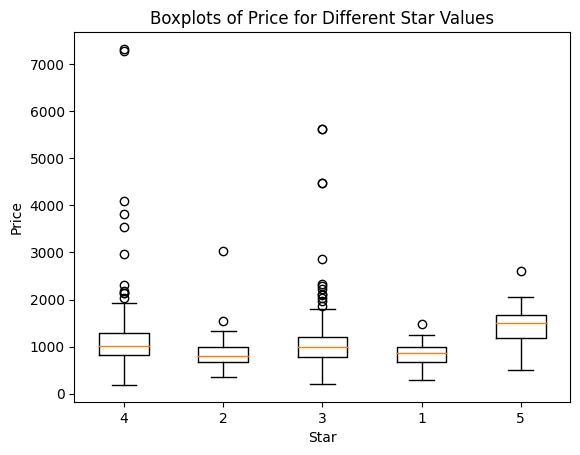

In [85]:
# Group the DataFrame by the 'Star' column and create boxplots for each group
plt.boxplot([df['Price'][df['Star'] == star] for star in df['Star'].unique()], 
            labels=df['Star'].unique())
plt.xlabel('Star')
plt.ylabel('Price')
plt.title('Boxplots of Price for Different Star Values')
plt.show()

In [86]:
# Independent variables
X = df[['barcelona']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              1445.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                   3.99e-155
Time:                        09:21:51   Log-Likelihood:                         -4322.2
No. Observations:                 544   AIC:                                      8646.
Df Residuals:                     543   BIC:                                      8651.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
# Independent variables
X = df[['event']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              513.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                    1.47e-80
Time:                        09:21:51   Log-Likelihood:                         -4494.0
No. Observations:                 544   AIC:                                      8990.
Df Residuals:                     543   BIC:                                      8994.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              533.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                   3.78e-161
Time:                        09:21:51   Log-Likelihood:                         -4300.9
No. Observations:                 544   AIC:                                      8608.
Df Residuals:                     541   BIC:                                      8621.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [89]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model without adding a constant term
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     24.03
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.31e-14
Time:                        09:21:51   Log-Likelihood:                -4296.9
No. Observations:                 544   AIC:                             8602.
Df Residuals:                     540   BIC:                             8619.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              447.7059    158.685  

In [90]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     21.99
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           7.93e-17
Time:                        09:21:51   Log-Likelihood:                -4289.9
No. Observations:                 544   AIC:                             8590.
Df Residuals:                     539   BIC:                             8611.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               43.3843    190.201  

In [91]:
# Create a new column 'Top_star' based on the condition
df['Top_star'] = (df['Star'].isin([4, 5])).astype(int)


In [92]:
# Calculate the number of observations meeting the specified conditions
num_observations = df[(df['barcelona'] == 1) & (df['Top_star'] == 1) & (df['event'] == 1)].shape[0]

# Display the result
print("Number of observations:", num_observations)

Number of observations: 137


In [93]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Top_star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     19.46
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.69e-15
Time:                        09:21:51   Log-Likelihood:                -4294.3
No. Observations:                 544   AIC:                             8599.
Df Residuals:                     539   BIC:                             8620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              380.1753    160.826  